# PRACTICA 4 - TRANSFORMADA DE FOURIER

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as plti
%matplotlib inline

In [2]:
M_YIQ = np.array([[0.299, 0.587, 0.114],
                  [0.595716, -0.274453, -0.321263],
                  [0.211456, -0.522591, 0.311135]])

M_RGB = np.array([[1, 0.9563, 0.6210],
                  [1, -0.2721, -0.6474],
                  [1, -1.1070, 1.7046]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, M_YIQ)

def yiq2rgb(img):
    return apply_matrix(img, M_RGB)

def plot_hist(im, bins, ax, cumulative=False):
    counts, borders = np.histogram(im if im.ndim==2 else rgb2yiq(im)[...,0], bins=bins, range=(0,1))
    ax.bar(range(len(counts)), np.cumsum(counts) if cumulative else counts)
    plt.xticks(ax.get_xticks(), labels=np.round(ax.get_xticks()/bins,2))
    plt.grid(alpha=0.3)

#Para calcular el error medio cuadrático.    
def rmse(img1, img2):
    return np.sqrt(np.mean((img1-img2)**2))

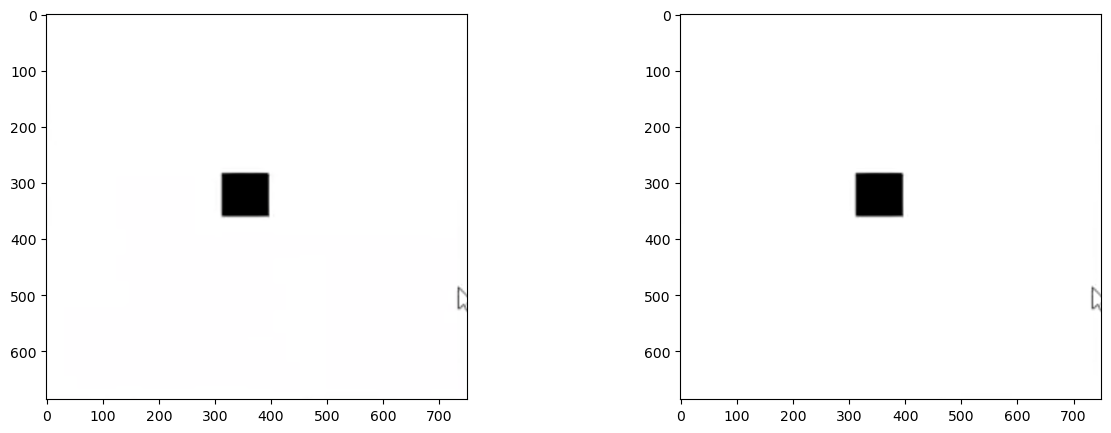

In [3]:
img_rgb = imageio.v2.imread("cuadrado.png")
#img = rgb2yiq(img_rgb)[:,:,0]
img = img_rgb[:,:,0]/255

fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img_rgb)
axes[1].imshow(img, 'gray')

 1. Calcular y mostrar el espectro en módulo y fase de una imagen en escala de grises. 
 2. Mostrar el módulo en escala logarítmica
 3. Guardar el espectro como imagen .png y modificarla (filtros)
 4. Implementar la transformada inversa que convierta el espectro guardado en la imagen original


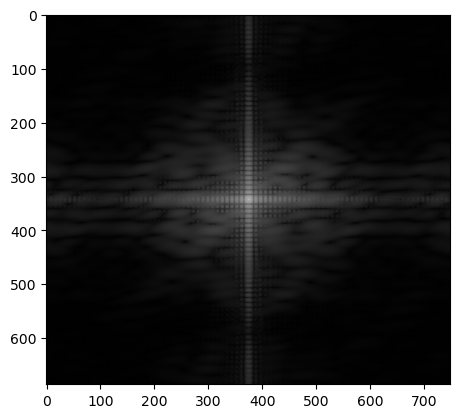

In [28]:
#https://numpy.org/doc/stable/reference/generated/numpy.fft.fft2.html
x = np.fft.fft2(img) #TF

x = np.fft.fftshift(x) #corrimiento

xm = np.abs(x) #modulo
xp = np.angle(x) 

#escala logaritmica
# xm = np.log(xm)

N, M = x.shape
alpha=1
beta=500
# Im_log = np.log10(alpha+xm)*beta
# Im_log = np.log(xm)
Im_log = Im_log/Im_log.max()

plt.imshow(Im_log, 'gray')

#guarda la imagen
plti.imsave("espectro.png", Im_log, cmap='gray')

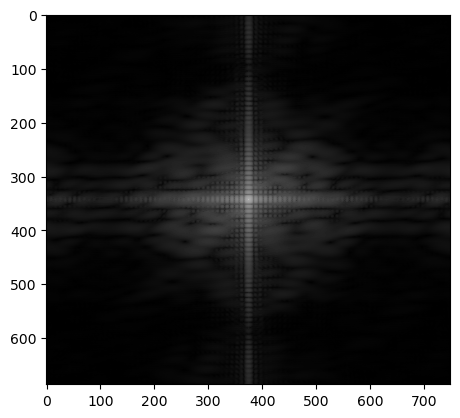

In [29]:
y_mod_log = imageio.v2.imread("espectro.png")[:,:,0]/255
y_mod_log = y_mod_log * 2932.5

plt.imshow(y_mod_log,'gray')


0.43833357925284344


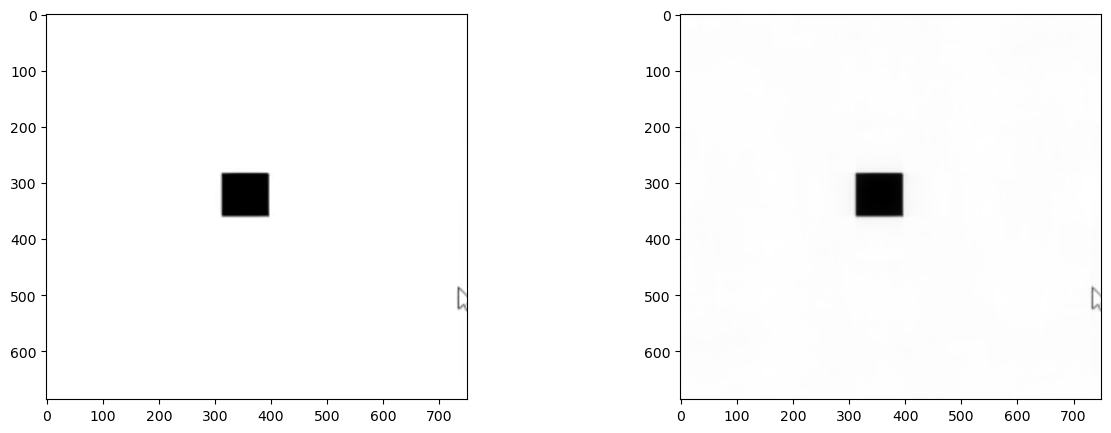

In [30]:
#transformada inversa para recuperar la imagen original

IIm = 10**(y_mod_log/beta)-alpha

#spectrum = np.empty(IIm.shape, dtype=complex) #Para crear una matriz vacia del tipo compleja.

spectrum = IIm * np.exp(1j * xp)
#spectrum = spectrum * N * M

#tf inversa
image_back = np.fft.ifft2(np.fft.ifftshift(spectrum))

#plt.imshow(np.abs(image_back),'gray')
fig, axes = plt.subplots(1, 2, figsize=(15,5))
axes[0].imshow(img,'gray')
axes[1].imshow(np.abs(image_back), 'gray')

#valor medio2 entre imgs
print(rmse(img,np.abs(image_back)))